<a href="https://colab.research.google.com/github/ashikshafi08/DUDL-Pytorch/blob/main/Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
# Importing the needed libraries 
import torch 
import torch.nn as nn 
import torch.nn.functional as F 


## Using the Dropout layer 



In [59]:
# Define a dropout instance and make some data 
prob = .5

dropout = nn.Dropout(p= prob) # default is .5 
x = torch.ones(10)

# Visualize the output 
y = dropout(x)
print(x)
print(y) # (1 - prob) 

print('\n')
print(torch.mean(y))

print(f'Scaling back: {y*(1- prob)}')

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
tensor([0., 0., 2., 2., 2., 2., 0., 2., 2., 0.])


tensor(1.2000)
Scaling back: tensor([0., 0., 1., 1., 1., 1., 0., 1., 1., 0.])


We can see that half of the nodes are switched off and half the values are doubled because the prob is .5 (50%). 

The dropout is switched off during the `eval()` mode. 



In [60]:
# Dropout is turned off when evaluating the model 
dropout.eval()
y = dropout(x)

print(torch.mean(x))
print(y)
print(torch.mean(y))

tensor(1.)
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
tensor(1.)


There is another method perhaps does the same thing but the dropout isn't turned off during the eval mode, so we gotta manually switch it off. 

In [61]:
# F.dropout() is not deactivated during the eval mode. 

dropout.eval() 
y = F.dropout(x) # turned on still 
y_ = dropout(x) # turned off 

print(f'Using the instancce of the class: {y_}')
print(y)
print(torch.mean(y))


Using the instancce of the class: tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
tensor([2., 0., 2., 2., 0., 0., 0., 0., 0., 0.])
tensor(0.6000)


In [62]:
# Manually switching off 
dropout.eval()
y = F.dropout(x , training= True) # Only on during the training , false turns it off 

print(y)
print(torch.mean(y))

tensor([0., 2., 2., 0., 0., 2., 0., 2., 0., 2.])
tensor(1.)


When we switch the model to `eval()` mode it stays in the eval mode till we turn it off 

In [63]:
# Training mode 

dropout.train()
y = dropout(x)
print(f'Training Mode: {y}')

# Eval mode 
dropout.eval()
y = dropout(x)
print(f'Eval Mode: {y}')

# Switching off the eval mode by enabling training mode 
dropout.train()
y = dropout(x)
print(f'Training Mode: {y}')

Training Mode: tensor([2., 0., 0., 0., 0., 0., 2., 0., 0., 0.])
Eval Mode: tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
Training Mode: tensor([0., 2., 0., 2., 0., 2., 0., 2., 0., 0.])


## Dropout In Action

In [64]:
# Importing the needed libraries 
import torch 
import torch.nn as nn 
import torch.nn.functional as F 
from torch.utils.data import DataLoader , TensorDataset

import numpy as np 
import matplotlib.pyplot as plt 
from IPython import display 
display.set_matplotlib_formats('svg')

from sklearn.model_selection import train_test_split 


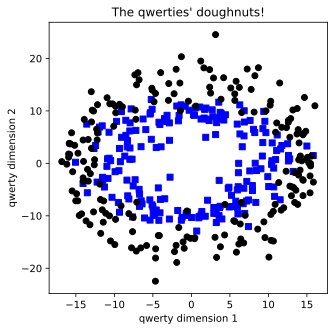

In [65]:
# Create the data 
# create data

nPerClust = 200

th = np.linspace(0,4*np.pi,nPerClust) # theta angle 
r1 = 10
r2 = 15

# generate data
# Below are the formula for x, y coordinates of a circle 

a = [ r1*np.cos(th) + np.random.randn(nPerClust)*3 ,
      r1*np.sin(th) + np.random.randn(nPerClust) ]
b = [ r2*np.cos(th) + np.random.randn(nPerClust) ,
      r2*np.sin(th) + np.random.randn(nPerClust)*3 ]

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

# concatanate into a matrix
data_np = np.hstack((a,b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title("The qwerties' doughnuts!")
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()


Lets separate the data into DataLoaders 

In [66]:
# Use sklearn to split the data 
train_data , test_data, train_labels , test_labels = train_test_split(data , labels , 
                                                                      test_size = .2)

# Then convert them into Pytorch Datasets (Its already in tensors)
trainDataset = TensorDataset(train_data , train_labels)
testDataset = TensorDataset(test_data , test_labels)

# Convert the dataset into dataloaders 
batchsize = 16 
trainLoader = DataLoader(trainDataset , batch_size= batchsize , shuffle = True) # loader with a batch size
testLoader = DataLoader(testDataset , batch_size= testDataset.tensors[0].shape[0])  # batch size will be all the samples in a test data 


# iterating and looking inside 
for x , y in trainLoader:
  print(x.shape , y.shape)

torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])


Now creating a model using the class method

In [67]:
class theModel(nn.Module):

  def __init__(self , dropoutRate , in_feat , out_feat):
    super().__init__()

    self.dr = dropoutRate 

    # Defining the layers we're about to use 
    self.input = nn.Linear(in_feat , 128)
    self.hidden = nn.Linear(128 , 128)
    self.output = nn.Linear(128 , out_feat)

  # Computing the forward pass 
  def forward(self , x):
    
    # Passing the data into a input layer 
    x = F.relu(self.input(x))

    # Passing the above output into a dropout layer 
    x = F.dropout(x , p = self.dr , training = self.training) 

    # Hidden layer after the dropout 
    x = F.relu(self.hidden(x))

    # Output layer 
    x = self.output(x)

    return x 



In [68]:
# Test the model witth toy data of same input size 
tmpnet = theModel(.25 , 2 , 1)


# Random data of same input size 
tmpdata = torch.randn((10 , 2))
yhat_ = tmpnet(tmpdata)
yhat_

tensor([[0.0873],
        [0.0146],
        [0.1864],
        [0.1692],
        [0.0801],
        [0.1922],
        [0.1036],
        [0.1665],
        [0.0868],
        [0.1590]], grad_fn=<AddmmBackward0>)

In [69]:
# Function to create and train the model 

def createAModel(dropoutrate):

  # Create an instance of the model class 
  annModel = theModel(dropoutrate , 2 , 1)

  # Loss function 
  lossfun = nn.BCEWithLogitsLoss()

  # Optimizer 
  optimizer = torch.optim.SGD(annModel.parameters() , lr = .002)

  return annModel , lossfun , optimizer

In [70]:
# Train the model 

numepochs = 1000 

# The function takes in the model ,loss function and optimizer as input 

def trainTheModel(annModel , lossfun , optimizer):

  # Initialize the accuracies as empties for later storage
  trainAcc = [] 
  testAcc = [] 


  # Looping over the epochs 
  for epoch in range(numepochs):

    # Switching on the train mode 
    annModel.train()
    
    # Loop over the training batches 
    batchAcc = []
    for X , y in trainLoader:

      # Forward pass and loss 
      yHat = annModel(X)
      loss = lossfun(yHat , y)

      # Backprop 
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # Compute the training accuracy just for this batch 
      batchAcc.append(100*torch.mean(((yHat > .5) ==y).float()).item())

    # After the training get the average of those batchees 
    trainAcc.append(np.mean(batchAcc))


    # Test accuracy 
    # Switching on the eval mode 
    annModel.eval()

    # Unpac the test loader 
    X , y = next(iter(testLoader)) 
    yHat = annModel(X)
    testAcc.append(100*torch.mean(((yHat > .5) ==y).float()).item())

  return trainAcc , testAcc



In [71]:
# Testing the model 
dropoutrate = .0

annModel, lossfun , optimizer = createAModel(dropoutrate)

# Train the model 
trainAcc , testAcc = trainTheModel(annModel , lossfun , optimizer)

In [72]:
# Create a 1D smoothing filter 
def smooth(x , k = 5):
  return np.convolve(x , np.ones(k) / k , mode ='same')

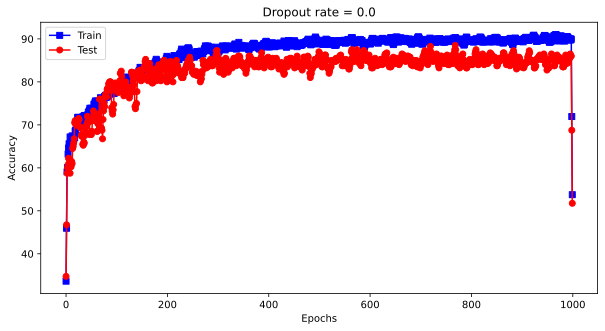

In [73]:


# Plotting the results 
fig = plt.figure(figsize =(10 , 5) )

plt.plot(smooth(trainAcc) , 'bs-')
plt.plot(smooth(testAcc) , 'ro-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train' , 'Test'])
plt.title(f'Dropout rate = {dropoutrate}')

plt.show()

The above graph looks cluttered because of the batch size, when the batch size is relatively small it limits the precision of the accuracy. 

Lets smooth out the function for better interpretation, smoothing trick from signal processing. 

We will convolve the input by a factor. 

#### Parameteric experiments 

One of my fav part, here we will run some experiments by varying the dropout rates. 


In [74]:
# Varying the dropout rates 

dropoutRates = np.arange(10) / 10 
results = np.zeros((len(dropoutRates) , 2)) # storing the dropout rates 


for rateIdx in range(len(dropoutRates)):

  # Create and train the model
  annModel , lossfun , optimizer = createAModel(dropoutRates[rateIdx])
  trainAcc , testAcc = trainTheModel(annModel , lossfun , optimizer)


  # Store the accuracies only from last 100 epochs 
  # The last 100 because at the beginning no model does good, so its better to take average during the times when learning seems efficient
  results[rateIdx , 0] = np.mean(trainAcc[-100:])
  results[rateIdx , 1] = np.mean(testAcc[-100:])


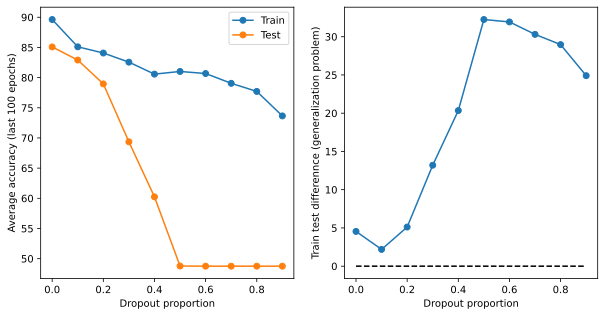

In [75]:
# Plot the experiment results 

fig, ax = plt.subplots(1 ,2 , figsize = (10 ,5))

ax[0].plot(dropoutRates , results, 'o-')
ax[0].set_xlabel('Dropout proportion')
ax[0].set_ylabel('Average accuracy (last 100 epochs)')
ax[0].legend(['Train' , 'Test'])

ax[1].plot(dropoutRates , -np.diff(results , axis = 1), 'o-')
ax[1].plot([0 , .9] , [0 ,0] , 'k--')
ax[1].set_xlabel('Dropout proportion')
ax[1].set_ylabel('Train test differennce (generalization problem)')


plt.show()

We can see that when the dropout rate was on the default the accuracy seems to be high, as we increase the dropout rates with time the performance of the model starts to fall off.  

The another plot is for understanding the generalization problem between the train and test set. The graph should be 0 in order to say its a good generalized model.  

As we can see large proportion of that graph seems to be positive so it means the training set is overfitting. 

Lets try the same experiment on the iris data 


In [76]:
# Importing the data 
import seaborn as sns 
iris = sns.load_dataset('iris')

iris_data = torch.tensor(iris[iris.columns[0:4]].values).float()

labels = torch.zeros(len(iris_data) , dtype = torch.long)
labels[iris.species == 'versicolor'] = 1
labels[iris.species == 'virginica'] = 2

iris_data.shape , labels.shape

(torch.Size([150, 4]), torch.Size([150]))

In [77]:
# Use sklearn to split the data 
train_data , test_data, train_labels , test_labels = train_test_split(iris_data , labels , 
                                                                      test_size = .2)

# Then convert them into Pytorch Datasets (Its already in tensors)
trainDataset = TensorDataset(train_data , train_labels)
testDataset = TensorDataset(test_data , test_labels)

# Convert the dataset into dataloaders 
batchsize = 16 
trainLoader = DataLoader(trainDataset , batch_size= batchsize , shuffle = True) # loader with a batch size
testLoader = DataLoader(testDataset , batch_size= testDataset.tensors[0].shape[0])  # batch size will be all the samples in a test data 


# iterating and looking inside 
for x , y in trainLoader:
  print(x.shape , y.shape)

torch.Size([16, 4]) torch.Size([16])
torch.Size([16, 4]) torch.Size([16])
torch.Size([16, 4]) torch.Size([16])
torch.Size([16, 4]) torch.Size([16])
torch.Size([16, 4]) torch.Size([16])
torch.Size([16, 4]) torch.Size([16])
torch.Size([16, 4]) torch.Size([16])
torch.Size([8, 4]) torch.Size([8])


In [78]:
# Create the model 

class IrisModel(nn.Module):

  def __init__(self , dropoutrate):
    super().__init__()

    self.input = nn.Linear(4 ,12)
    self.hidden = nn.Linear(12 ,12)
    self.output = nn.Linear(12 , 3)

    self.dr = dropoutrate
  
  def forward(self , x):

    x = F.relu(self.input(x))
    x = F.dropout(x , p = self.dr , training = self.training)
    
    x = F.relu(self.hidden(x))
    x = F.dropout(x , p = self.dr , training = self.training)

    x = self.output(x)
    return x 

In [79]:
# Test the model 
tmpnet = IrisModel(.4)

dum_ = torch.randn((10 , 4))
yhat_ = tmpnet(dum_)

print(yhat_)

tensor([[-0.3508,  0.2142, -0.0833],
        [-0.1231,  0.2214, -0.2772],
        [-0.2809,  0.2004, -0.0823],
        [-0.2195,  0.3733, -0.3282],
        [-0.0121,  0.1156, -0.2552],
        [-0.0373,  0.2328, -0.1744],
        [-0.2480,  0.1620, -0.1612],
        [-0.2369,  0.2996, -0.1605],
        [-0.3988,  0.2825, -0.1395],
        [-0.1252,  0.2779, -0.2330]], grad_fn=<AddmmBackward0>)


In [80]:
# Function to create and train the model 

def createAModel(dropoutrate):

  # Create an instance of the model class 
  annIris = IrisModel(dropoutrate)

  # Loss function 
  lossfun = nn.CrossEntropyLoss()

  # Optimizer 
  optimizer = torch.optim.SGD(annModel.parameters() , lr = .002)

  return annIris , lossfun , optimizer

In [81]:
# Train the model 

numepochs = 1000 

def trainIrisModel(annIris , lossfun , optimizer):

  # Intialize the storage empty list
  trainAcc = []
  testAcc = []

  for epoch in range(numepochs):

    # Switching on the training 
    annIris.train()

    # Looping over the batch 
    batchAcc = []
    for X , y in trainLoader:

      # Forward pass 
      yHat = annIris(X)
      loss = lossfun(yHat , y)

      # Back pass
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()


      # Compute the accuracy for each batch 
      batchAcc.append(100 * torch.mean((torch.argmax(yHat , axis = 1) == y).float()).item())

    # Getting the average of the batch accuracy 
    trainAcc.append(np.mean(batchAcc))

    # Test accuracy 
    # Eval mode is on 
    annIris.eval()
    X , y = next(iter(testLoader))
    predLabels = torch.argmax(annIris(X) , axis = 1)
    testAcc.append(100*torch.mean((predLabels == y).float()).item())

  return trainAcc , testAcc 


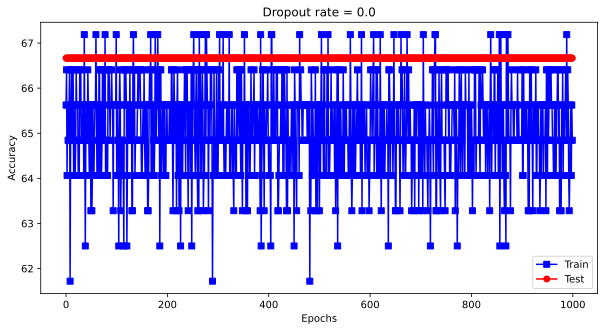

In [82]:
# Training the model 
# Testing the model 
dropoutrate = .0

annIris, lossfun , optimizer = createAModel(dropoutrate)

# Train the model 
trainAcc , testAcc = trainIrisModel(annIris , lossfun , optimizer)

# Plotting the results 
fig = plt.figure(figsize =(10 , 5) )

plt.plot(trainAcc , 'bs-')
plt.plot(testAcc , 'ro-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train' , 'Test'])
plt.title(f'Dropout rate = {dropoutrate}')

plt.show()